# Twitter Data Science

### Start off by importing all the nescesary libraries 

In [10]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import plotly.express as px


In [11]:
import nest_asyncio
import twint

nest_asyncio.apply()

c = twint.Config()
c.Username = "FlatironSchool"
c.Output = "flatiron_tweets.csv"
c.Hide_output = True
c.Store_csv = True

twint.run.Search(c)


/Users/matt/.pyenv/versions/3.8.3/envs/tweet/lib/python3.8/site-packages/idna/core.py:308: RuntimeWarning: coroutine 'Twint.main' was never awaited
  check_label(label)
CRITICAL:root:twint.get:User:
/Users/matt/.pyenv/versions/3.8.3/envs/tweet/lib/python3.8/site-packages/bs4/element.py:1099: RuntimeWarning: coroutine 'Twint.main' was never awaited
  self.parser_class = parser.__class__


### Organize the data into a pandas dataframe

In [12]:
df = pd.read_csv("flatiron_tweets.csv")

In [13]:
df.head()

id      conversation_id     created_at        date  \
0  1273007049555787778  1272988316376412160  1592343506000  2020-06-16   
1  1273006964918935553  1273002012762931200  1592343486000  2020-06-16   
2  1272923338772549636  1272923338772549636  1592323548000  2020-06-16   
3  1272886005662732290  1272886005662732290  1592314647000  2020-06-16   
4  1272689292117250049  1272674962269077505  1592267747000  2020-06-15   

       time timezone    user_id        username                    name  \
0  17:38:26      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
1  17:38:06      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
2  12:05:48      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
3  09:37:27      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
4  20:35:47      EDT  702354494  flatironschool  Flatiron School (at 🏡)   

   place  ... geo source user_rt_id user_rt  retweet_id  \
0    NaN  ... NaN    NaN        NaN     NaN         NaN   
1    NaN  ... NaN    NaN        NaN     NaN         NaN   
2    NaN  ... NaN    NaN        NaN     NaN         NaN   
3    NaN  ... NaN    NaN        NaN     NaN         NaN   
4    NaN  ... NaN    NaN        NaN     NaN         NaN   

                                            reply_to  retweet_date translate  \
0  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
1  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
2  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
3  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
4  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 34 columns]

In [14]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [15]:
shape = df.shape
print(f'rows: {shape[0]} cols: {shape[1]}')

rows: 23899 cols: 34


### filter the dataframe to keep data features I want

In [16]:
keep = ['date','time','user_id','tweet','mentions','replies_count',
        'retweets_count', 'likes_count', 'hashtags']

In [17]:
tweet_df = df.copy()[keep]

In [18]:
tweet_df.head()

date      time    user_id  \
0  2020-06-16  17:38:26  702354494   
1  2020-06-16  17:38:06  702354494   
2  2020-06-16  12:05:48  702354494   
3  2020-06-16  09:37:27  702354494   
4  2020-06-15  20:35:47  702354494   

                                               tweet  \
0                         pic.twitter.com/JRfktJjYjs   
1                         pic.twitter.com/zzHKhTCOu4   
2  At Flatiron School, we believe diversity and i...   
3  Join us as we bring together some of our most ...   
4  How exciting! Let us know if you have any ques...   

                                        mentions  replies_count  \
0                                 ['dino_momma']              0   
1                             ['iammisterclean']              0   
2                                             []              0   
3                                             []              0   
4  ['codinghall', 'rubenharris', 'career_karma']              0   

   retweets_count  likes_count                          hashtags  
0               0            1                                []  
1               0            0                                []  
2               0           14                   ['#pridemonth']  
3               2           11  ['#changemakers', '#pridemonth']  
4               0            3                                []

In [19]:
tweet_df["date"] = tweet_df["date"].astype("datetime64")

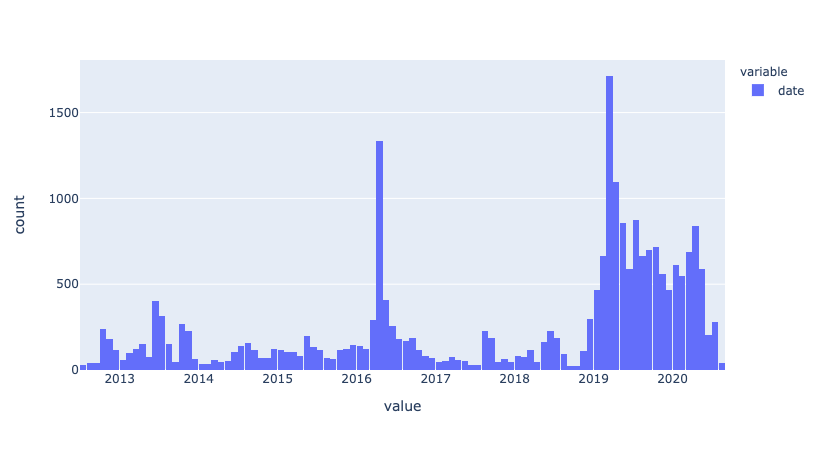

In [20]:
px.histogram(tweet_df.date)

In [21]:
likes = tweet_df.likes_count.sum()
print (f'Total likes: {likes}')

Total likes: 92409


In [22]:
replies = tweet_df.replies_count.sum()
print (f'Total likes: {replies}')

Total likes: 6018


In [23]:
## Natural Language Processing

In [24]:
#data cleanup

In [25]:
#make tweets list from string
tweet_df.hashtags = tweet_df.hashtags.apply(lambda x: eval(x))


In [26]:
#import nlp library spacy

import spacy

nlp = spacy.load("en_core_web_md")

In [27]:
nlp_df = df.copy()[['date','tweet', 'hashtags']]

In [28]:
#regular expression to remove url
import re
def strip_url(tweet):
    try:
        clean_tweet = re.sub(r"pic.\S+", "", tweet)
        return clean_tweet.strip()
    except:
        return tweet.strip()

In [29]:
#create tokens with spacy
nlp_df['clean_tweet'] = nlp_df.tweet.apply(lambda x: strip_url(x))

In [30]:
#put all tokens into corups objects
corpus = []

for doc in nlp_df.clean_tweet:
    d = (list(filter(lambda x: x.is_stop==False,nlp(doc))))
    d = (list(filter(lambda x: x.is_punct==False, d)))
    d = (list(filter(lambda x: x.like_url==False, d)))
    d = (list(map(lambda x: x.lemma_, d)))
    corpus.append(d)

In [31]:
#create number of hashtags
hash_count = {}
for mention in tweet_df.hashtags:
    if len(mention) !=0 :
        for person in mention:
            hash_count[person] = hash_count.get(person, 0) + 1

In [32]:
#create word frequency
word_freq = {}
for doc in corpus:
    for word in doc:
        word_freq[word] = word_freq.get(word,0) + 1

In [33]:
word_counts = pd.DataFrame(word_freq.items())
word_counts.columns = ['word','count']
hash_count = pd.DataFrame(hash_count.items())
hash_count.columns = ['hashtag', 'count']

In [47]:
word_counts.sort_values('count', ascending=False, inplace=True)

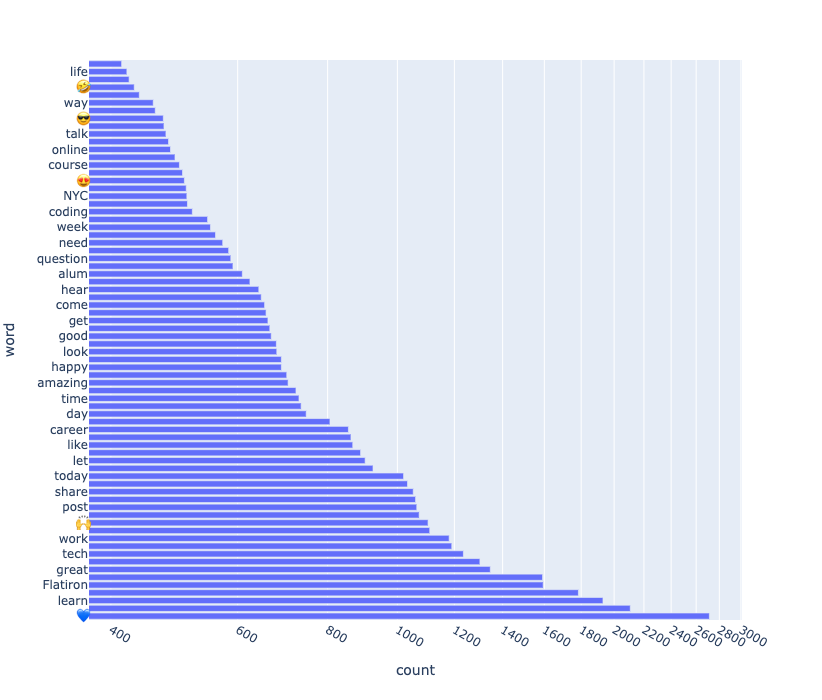

In [68]:
import plotly.express as px

px.bar(word_counts[3:75],x='count', y='word', orientation='h'
      ,width=800, height=700,log_x=True)

In [40]:
hash_count.sort_values('count', ascending=False, inplace=True)

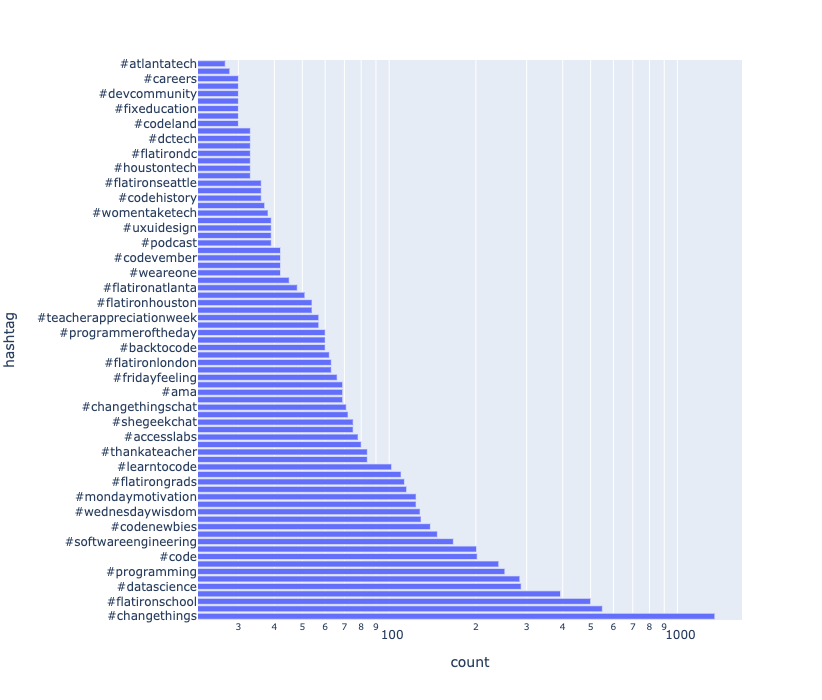

In [49]:
px.bar(hash_count[:75],x='count', y='hashtag', orientation='h'
      ,width=800, height=700,log_x=True)

# Generate a word cloud image for hashtags

(-0.5, 399.5, 199.5, -0.5)

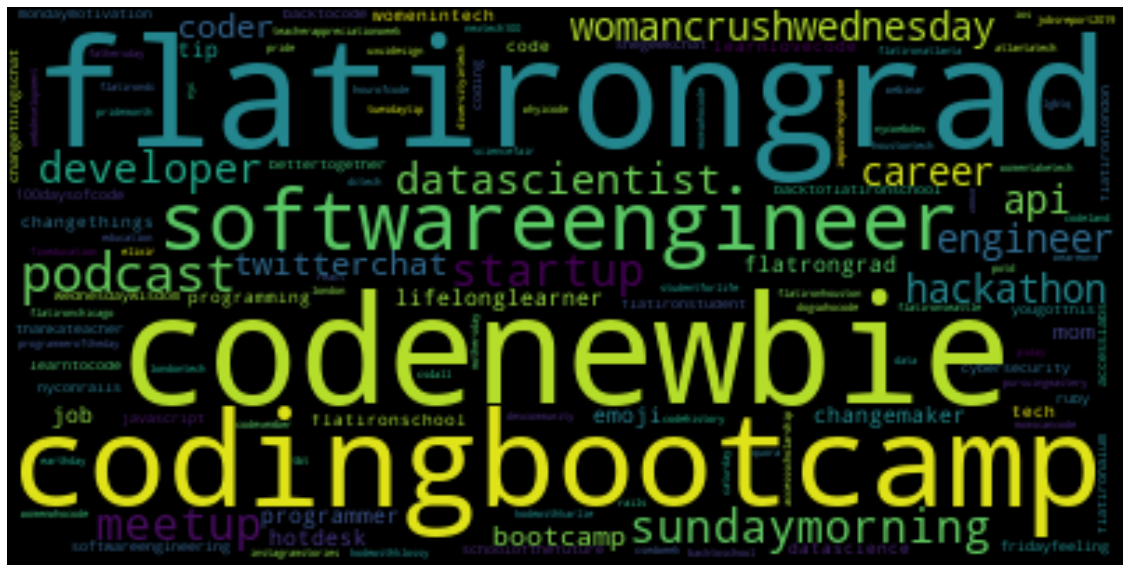

In [45]:
wordcloud = WordCloud().generate((' ').join(list(hash_count.hashtag)))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

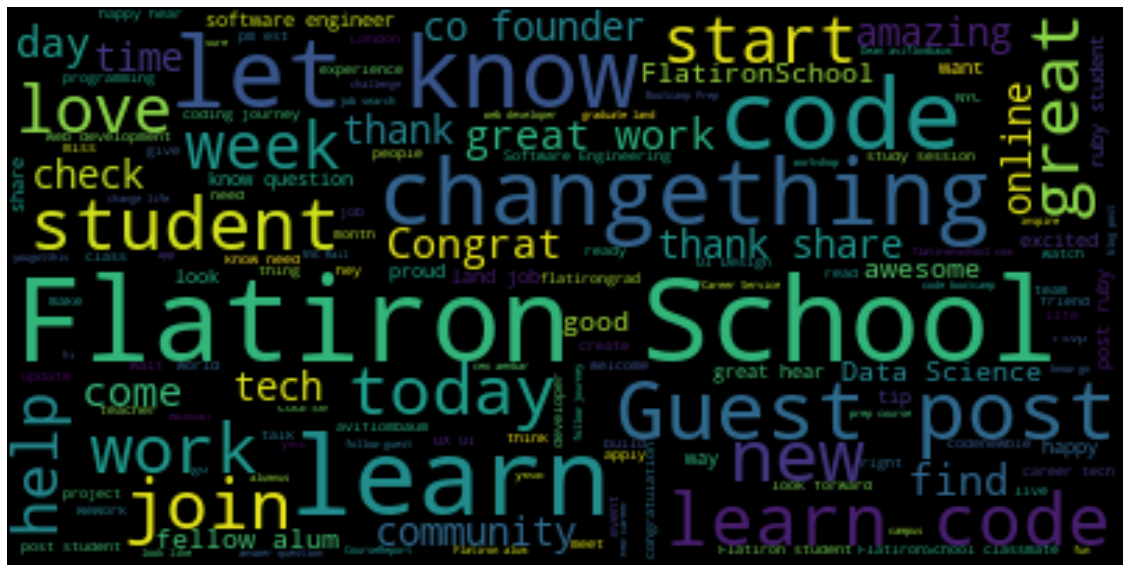

In [46]:
corpus_str = list(map(lambda x: (' ').join(x),corpus))
wordcloud = WordCloud().generate((' ').join(corpus_str))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Text Generation via recurrent neural network

In [40]:
from textgenrnn import textgenrnn
textgen=textgenrnn('flatironschool_twitter_weights.hdf5',vocab_path='flatironschool_twitter_vocab.json',
                  config_path='flatironschool_twitter_config.json')
textgen.generate_samples(n=15)

####################
Temperature: 0.2
####################
Thank you for sharing, Beky!! So excited to have you join our #changethings community. Looking fwd to following along your journey 💙

Hey Ashok! Looks like yours went out on the steps we've get interviewing students to stressful to reach out to COVID-19.
 What it’s the sears and secure out to our #flatirongrad and former an #imansationalwomen career in #tech and are a few 🙂 #codenewbies

Welcome to the #changethings fam, Erick! 🎉🎉🎉

We asked our students (like you for you 💙." - #softwareengineer at up wind to admissions.com about their job search during $1... - if you’re thinking about a career in #design—through coming with our new importing software engineering alum stressfelly inspiration!

Amazing! Keep up the great work :D

We asked our students (like you for you 💙." - #Sandns #changethings

We are so proud to work with you on this important those who have from #Cybersecurity Engineering is now available at our London camp